<a href="https://colab.research.google.com/github/karthikmohan1702/EIP_4/blob/master/leaf_infected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


(341, 512, 3)


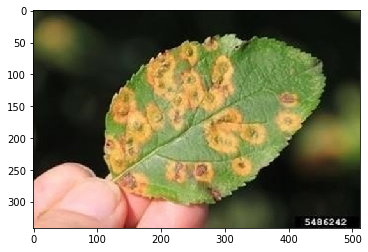

In [0]:
img = mpimg.imread('/gdrive/My Drive/Colab Notebooks/medium_coding/Leaf_infected_project/leaf_1.jpg')
print(img.shape)
imgplot = plt.imshow(img)

In [0]:
path = '/gdrive/My Drive/Colab Notebooks/medium_coding/Leaf_infected_project/leaf_1.jpg'

In [0]:
def bgr_to_hsv(a,b,c):
  color = np.uint8([[[a,b,c ]]])
  hsv_color = cv2.cvtColor(color,cv2.COLOR_BGR2HSV)
  return(list((hsv_color[0][0][0],hsv_color[0][0][1],hsv_color[0][0][2])))


In [0]:
abc = bgr_to_hsv(12,15,20)
abc

[11, 102, 20]

In [0]:

def img_processing(path):
  leaf = cv2.imread(path)
  img_hsv=cv2.cvtColor(leaf, cv2.COLOR_BGR2HSV)

  # lower mask (0-10)
  lower_red = np.array(bgr_to_hsv(12,15,20))
  upper_red = np.array(bgr_to_hsv(0,133,200))
  mask0 = cv2.inRange(img_hsv, lower_red, upper_red)

  result = cv2.bitwise_and(leaf.copy(), leaf.copy(), mask=mask0)

  output_img = result
  output_img[np.where(mask0==0)] = 0
  image_blurred = cv2.GaussianBlur(output_img, (0, 0), 3)
  image_sharp = cv2.addWeighted(output_img, 1.5, image_blurred, -0.5, 0)

  img_hsv=cv2.cvtColor(image_sharp, cv2.COLOR_BGR2GRAY)
  edged = cv2.Canny(img_hsv, 30, 200)

  contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print("Number of Contours found = " + str(len(contours)))
  cv2.drawContours(leaf, contours, -1, (0, 255, 0), 3) 
  cv2_imshow(leaf)
  return(contours)


In [0]:
def max_area_cntr(contours):
  area = []
  for region in contours:
    x, y, w, h = cv2.boundingRect(region)
    abc = area.append(w*h)
  max_area = max(area)
  print("max area of contour is {} of leaf ".format(max_area))
  return(max_area)


Number of Contours found = 364


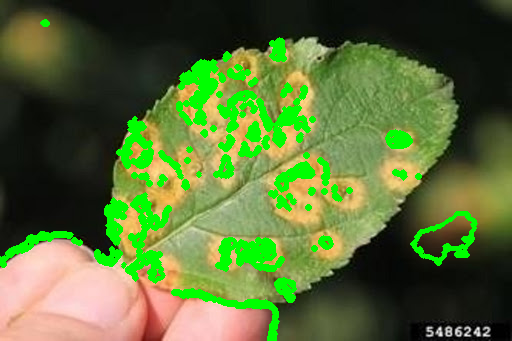

max area of contour is 1311 of leaf 


1311

In [0]:
max_area_cntr(contours=img_processing(path))

In [0]:
area=[]
coord = []  ### clear coord

def removed_cntr(contours,path,threshold):
  threshold = max_area_cntr(contours) - threshold
  leaf = cv2.imread(path)
  for region in contours:
    x, y, w, h = cv2.boundingRect(region)
    area_cntr = w*h
    abc = area.append(area_cntr)
    if area_cntr < threshold:
      continue
    print(area_cntr)
    coord.append((x,y,w,h))
    cv2.rectangle(leaf, (x, y), (x + w, y + h), (0, 255, 0), 1)
  cv2_imshow(leaf)
  return (coord)


Number of Contours found = 364


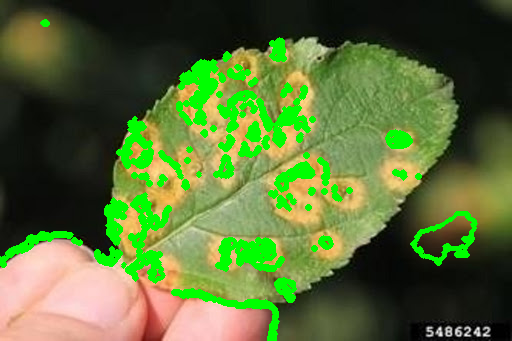

max area of contour is 1311 of leaf 
1008
572
540
589
589
952
544
1311
1064
968
840
650
728


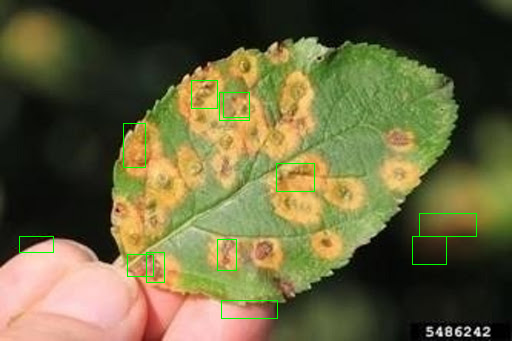

[(419, 213, 57, 23),
 (221, 300, 56, 18),
 (412, 236, 34, 28),
 (419, 213, 57, 23),
 (276, 163, 38, 28),
 (123, 123, 22, 44),
 (219, 92, 30, 28),
 (221, 300, 56, 18),
 (127, 254, 26, 22),
 (146, 252, 18, 30),
 (217, 239, 19, 31),
 (217, 239, 19, 31),
 (412, 236, 34, 28),
 (19, 236, 34, 16),
 (419, 213, 57, 23),
 (276, 163, 38, 28),
 (123, 123, 22, 44),
 (219, 92, 30, 28),
 (223, 92, 26, 25),
 (191, 80, 26, 28)]

In [0]:
removed_cntr(img_processing(path),path,800)

In [0]:
coord

[(293, 188, 103, 68), (592, 86, 34, 37), (477, 9, 48, 43), (543, 0, 50, 72)]

In [0]:
compre = [list(i) for i in coord]

In [0]:
compre

[[293, 188, 103, 68], [592, 86, 34, 37], [477, 9, 48, 43], [543, 0, 50, 72]]